In [84]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rossmann-store-sales/store.csv
/kaggle/input/rossmann-store-sales/train.csv
/kaggle/input/rossmann-store-sales/test.csv


In [85]:
#범주형 자료의 수량화
x=[{'city':'seoul','temp':10.0},{'city':'Dubai','temp':33.5},{'city':'LA','temp':20.0}]
x

[{'city': 'seoul', 'temp': 10.0},
 {'city': 'Dubai', 'temp': 33.5},
 {'city': 'LA', 'temp': 20.0}]

In [86]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False) # Fasle 해야 눈으로 볼 수 있음
vec.fit_transform(x) #x를 범주형 수량화 자료로 변환

array([[ 0. ,  0. ,  1. , 10. ],
       [ 1. ,  0. ,  0. , 33.5],
       [ 0. ,  1. ,  0. , 20. ]])

In [87]:
#그냥 해본거...
#from sklearn.feature_extraction import DictVectorizer
#vec=DictVectorizer() 
#t=vec.fit_transform(x).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환

#import pandas as pd
#t1=pd.DataFrame(t, columns=vec.get_feature_names())
#t1

In [88]:
# 텍스트 자료의 수량화 
text=['떴다 떴다 비행기 날아라 날아라',
      '높이 높이 날아라 우리 비행기',
      '내가 만든 비행기 날아라 날아라',
      '멀리 멀리 날아라 우리 비행기']
text

['떴다 떴다 비행기 날아라 날아라',
 '높이 높이 날아라 우리 비행기',
 '내가 만든 비행기 날아라 날아라',
 '멀리 멀리 날아라 우리 비행기']

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vec2 = CountVectorizer()
t=vec2.fit_transform(text).toarray() # sparse=True를 풀고 text를 수량화 배열 자료로 변환

import pandas as pd
t1=pd.DataFrame(t, columns=vec2.get_feature_names())
t1

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,2,0,0,2,0,0,1,0
1,1,0,2,0,0,0,1,1
2,2,1,0,0,1,0,1,0
3,1,0,0,0,0,2,1,1


In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()
x2=tfid.fit_transform(text).toarray() # 높은 빈도는 낮은 가중치, 낮은 빈도는 높은 가중치
x3=pd.DataFrame(x2,columns=tfid.get_feature_names())
x3

,날아라,내가,높이,떴다,만든,멀리,비행기,우리
0,0.450735,0.000000,0.00000,0.86374,0.000000,0.00000,0.225368,0.000000
1,0.229589,0.000000,0.87992,0.00000,0.000000,0.00000,0.229589,0.346869
2,0.569241,0.545415,0.00000,0.00000,0.545415,0.00000,0.284620,0.000000
3,0.229589,0.000000,0.00000,0.00000,0.000000,0.87992,0.229589,0.346869


In [91]:
import numpy as np
# 결측자료 대체
x_miss=np.array([[1,2,3,None],[5,np.NAN,7,8],[None,10,11,12],[13,np.nan,15,16]])
x_miss

array([[1, 2, 3, None],
       [5, nan, 7, 8],
       [None, 10, 11, 12],
       [13, nan, 15, 16]], dtype=object)

In [92]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(missing_values=np.nan, strategy='mean')
im.fit(x_miss)


SimpleImputer()

In [97]:
#import pandas as pd
df1=pd.read_csv("../input/rossmann-store-sales/train.csv",engine='python') #engine='python'안붙이기..?
print(df1.shape)
type(df1)

(1017209, 9)


pandas.core.frame.DataFrame

In [94]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [100]:
df2=pd.read_csv("../input/rossmann-store-sales/store.csv",engine='python')
df2.shape # 크기

(1115, 10)

In [101]:
df=pd.merge(df1,df2,on='Store')
df.shape

(1017209, 18)

In [102]:
df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [107]:
#불균형 데이터 만들기
from collections import Counter   
from sklearn.datasets import make_classification #중요 #중요
from imblearn.over_sampling import SMOTE, ADASYN

# n_feature 변경, n_informative와 n_redundant 추가
X, y = make_classification(n_classes=3, weights=[0.03, 0.07,0.9],n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_samples=200, random_state=10)

# n_clases 3개 
# n_features 열 2, n_informative 행 2-> 2차원 데이터
# n_samples=200------- 200*2 짜리 데이터
# n_informative=2는 features 와 동일
print('Original dataset shape %s' % Counter(y))  

Original dataset shape Counter({2: 180, 1: 14, 0: 6})


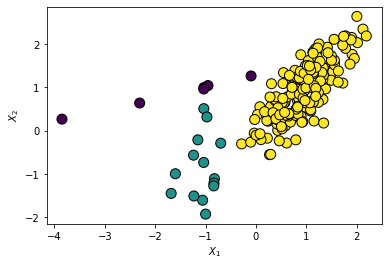

In [112]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=1) #k는 검정

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [113]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({2: 180, 1: 180, 0: 180})


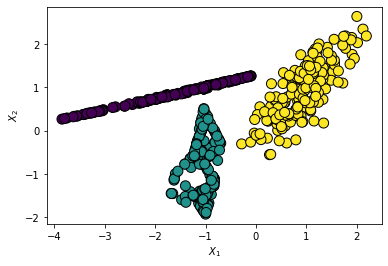

In [114]:
import matplotlib.pyplot as plt

plt.scatter(X_res[:, 0], X_res[:, 1], marker='o', c=y_res,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [115]:
ada=ADASYN(random_state=0)
X_syn,y_syn=ada.fit_resample(X,y)
print('Resampled dataset shape from ADASYN %s' % Counter(y_syn))

Resampled dataset shape from ADASYN Counter({2: 180, 1: 179, 0: 178})


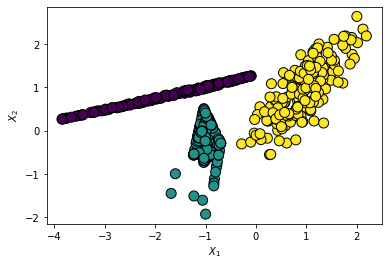

In [116]:
import matplotlib.pyplot as plt

plt.scatter(X_syn[:, 0], X_syn[:, 1], marker='o', c=y_syn,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [117]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=3, n_neighbors_ver3=3)
# transform the dataset
X_Under, y_Under = undersample.fit_resample(X, y)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_Under[:, 0], X_Under[:, 1], marker='o', c=y_Under,
            s=100, edgecolor="k", linewidth=1)

plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()